In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor



In [2]:
df = pd.read_csv("C:/Users/balad/OneDrive/Documents/Projects/flights-encoded.csv")
df.head

<bound method NDFrame.head of         month  day  sched_dep_time  dep_delay  sched_arr_time  arr_delay  \
0           1    1             315        2.0             499       11.0   
1           1    1             329        4.0             510       20.0   
2           1    1             340        2.0             530       33.0   
3           1    1             345       -1.0             622      -18.0   
4           1    1             360       -6.0             517      -25.0   
...       ...  ...             ...        ...             ...        ...   
327341      9   30            1365       -5.0            1431      -17.0   
327342      9   30            1370      -10.0               7      -20.0   
327343      9   30            1366       -5.0               1      -16.0   
327344      9   30            1375       12.0            1438        1.0   
327345      9   30            1439      -10.0             230      -25.0   

        carrier  flight  origin  dest  distance  day_of_w

In [3]:
print(df.columns)

Index(['month', 'day', 'sched_dep_time', 'dep_delay', 'sched_arr_time',
       'arr_delay', 'carrier', 'flight', 'origin', 'dest', 'distance',
       'day_of_week'],
      dtype='object')


In [4]:
# # Select specific features for training and prediction
# selected_features = ['dep_delay', 'sched_dep_time', 'sched_arr_time', 'arr_delay']  # Include target variable

# Filter DataFrame to include only where arr_delay is non negative
df_selected = df[df['arr_delay'] >= 0]

# Split dataset into features (X) and target variable (y)
X = df_selected.drop('arr_delay', axis=1)
y = df_selected['arr_delay']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression with linear activation
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Display model summary
model.summary()

# Train the Model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error on Test Set: {mae}")

C:\Users\balad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2769/2769 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 975.3444 - mae: 18.1060 - val_loss: 305.2825 - val_mae: 12.1983
Epoch 2/10
2769/2769 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 334.6561 - mae: 12.6848 - val_loss: 303.0302 - val_mae: 12.3397
Epoch 3/10
2769/2769 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 326.4322 - mae: 12.5277 - val_loss: 299.9425 - val_mae: 12.2047
Epoch 4/10
2769/2769 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 325.6316 - mae: 12.5563 - val_loss: 325.0211 - val_mae: 12.2349
Epoch 5/10
2769/2769 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 329.8283 - mae: 12.5432 - val_loss: 307.4745 - val_mae: 12.6095
Epoch 6/10
2769/2769 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 323.4482 - mae: 12.4884 - val_loss: 298.5920 - val_mae: 12.2032
Epoch 7/10
2769/2769 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 324.8954 - mae: 12.5297 - val_loss: 301.4904 - val_mae: 12.0092
Epoch 8/10
2769/2769 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 323.8602 - mae: 12.4976 - val_loss: 298.8711 - val_mae: 

866/866 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step


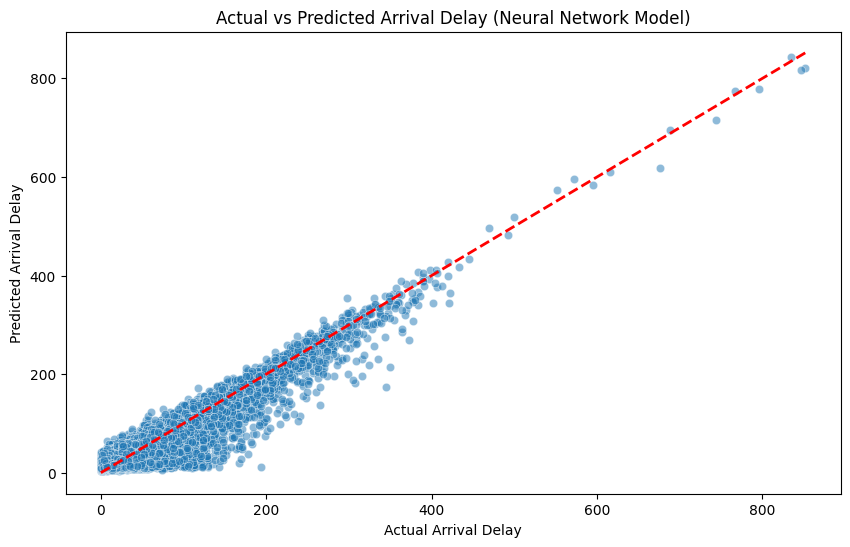

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.5)  # Flatten y_pred if needed
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Arrival Delay (Neural Network Model)')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.show()


In [6]:


# Filter DataFrame to include only selected features
df_selected = df

# Split dataset into features (X) and target variable (y)
X = df_selected.drop('arr_delay', axis=1)
y = df_selected['arr_delay']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, normalize features (if needed)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

Mean Absolute Error on Test Set: 13.06240513189179


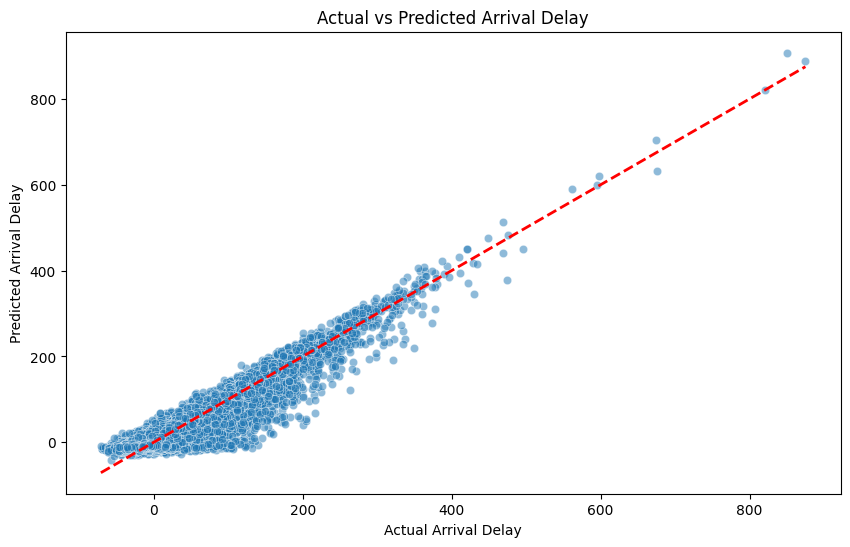

In [7]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Arrival Delay')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.show()

Mean Absolute Error on Test Set: 11.682538161562547


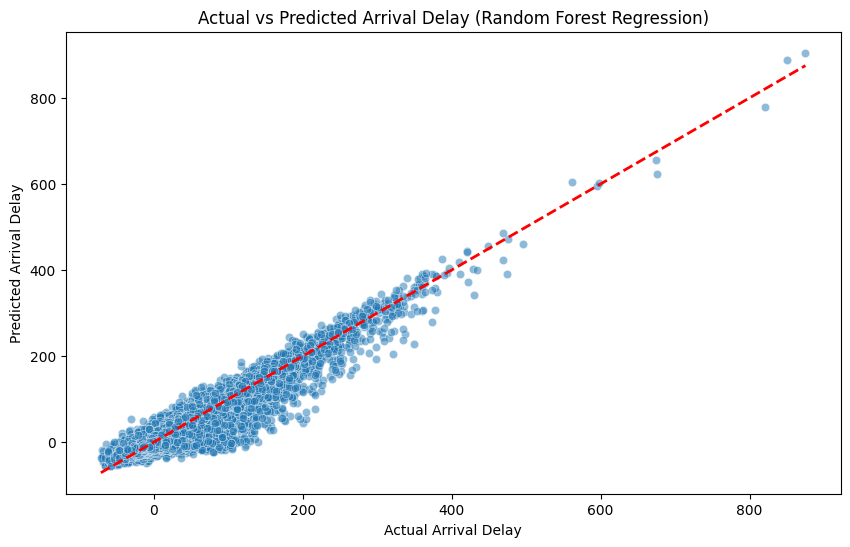

In [8]:
# Split dataset into features (X) and target variable (y)
X = df_selected.drop('arr_delay', axis=1)
y = df_selected['arr_delay']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=256, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae}")

# Visualize Predicted vs Actual Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Arrival Delay (Random Forest Regression)')
plt.xlabel('Actual Arrival Delay')
plt.ylabel('Predicted Arrival Delay')
plt.show()